In [177]:
import csv
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import numpy as np
%matplotlib inline

In [118]:
# Borrowed from stack exchange.
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [119]:
ls ../data

2016_US_County_Level_Presidential_Results.csv
538_approval_polllist.csv
538_approval_topline.csv
Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv
Public_Health_Statistics-_Selected_underlying_causes_of_death_in_Chicago__2006___2010.csv
TIF_Funding_Sources_and_Uses_by_TIF__Fiscal_Year__and_Type.csv
US_County_Level_Presidential_Results_08-16.csv
__pycache__/
data_processing.py
dkos18.csv
generic_polllist.csv*
generic_topline.csv*
pollster-ratings.csv
pollster-ratings_528csv.csv
raw-polls_528.csv
special-elections_538.csv
standardized_report.csv


In [120]:
dfile = '../data/dkos18.csv'
dfile2 = '../data/special-elections_538.csv'

In [121]:
dfkos = pd.read_csv(dfile,parse_dates=True,date_parser='date')
df538 = pd.read_csv(dfile2, parse_dates=True)

In [122]:
dfkos.head()

,date,state,District,held_by,winner,18_d_vshare,18_r_vshare,18_marg,16_clinton,16_trump,16_margin,16_marg_diff,12_obama,12_romney,12_margin,12_marg_diff
0,1-May-18,FL,HD-39,(R),(R),0.40,0.60,-0.20,0.39,0.58,-0.19,-0.01,0.43,0.56,-0.12,-0.07
1,1-May-18,FL,HD-114,(D),(D),0.51,0.47,0.04,0.56,0.42,0.14,-0.10,0.50,0.49,0.01,0.03
2,24-Apr-18,AZ,AZ-08,(R),(R),0.47,0.52,-0.05,0.37,0.58,-0.21,0.16,0.37,0.62,-0.25,0.20
3,24-Apr-18,NY,SD-32,(D),(D),0.89,0.02,0.86,0.93,0.05,0.88,-0.02,0.97,0.03,0.94,-0.07
4,24-Apr-18,NY,SD-37,(D),(D),0.57,0.43,0.15,0.59,0.38,0.22,-0.07,0.54,0.45,0.09,0.06


In [123]:
df538.head()

,date,state,istrict,median_inc,%_bach_degree,clinton_over_BO,18_over_lean
0,3/27/18,Alabama,HD-21,65548.0,0.42,0.06,0.24
1,3/13/18,Pennsylvania,18th CD,62283.0,0.35,-0.03,0.22
2,3/13/18,Tennessee,SD-14,48252.0,0.22,-0.08,0.01
3,3/6/18,Oklahoma,HD-51,57202.0,0.18,-0.08,0.21
4,2/27/18,Kentucky,HD-89,37858.0,0.16,-0.05,0.29


In [124]:
print(df538.shape)
print(dfkos.shape)

(200, 7)
(107, 16)


In [125]:
# Fix typo in 538 dataframe
df538['District'] = df538['istrict']
df538.drop('istrict', inplace=True, axis=1)

# To datetime
dfkos['date']=pd.to_datetime(dfkos['date'], infer_datetime_format=True)
df538['date']=pd.to_datetime(df538['date'], infer_datetime_format=True)

# Create an interaction variable to play with. Education level * income
df538['edu_x_inc'] = df538['%_bach_degree']*df538['median_inc']
df538.head()

,date,state,median_inc,%_bach_degree,clinton_over_BO,18_over_lean,District,edu_x_inc
0,2018-03-27,Alabama,65548.0,0.42,0.06,0.24,HD-21,27530.16
1,2018-03-13,Pennsylvania,62283.0,0.35,-0.03,0.22,18th CD,21799.05
2,2018-03-13,Tennessee,48252.0,0.22,-0.08,0.01,SD-14,10615.44
3,2018-03-06,Oklahoma,57202.0,0.18,-0.08,0.21,HD-51,10296.36
4,2018-02-27,Kentucky,37858.0,0.16,-0.05,0.29,HD-89,6057.28


Text(0.5,1,'HRC Voteshare & Obama 2012 Voteshare Plotted \n Against Dem Special Election Voteshare')

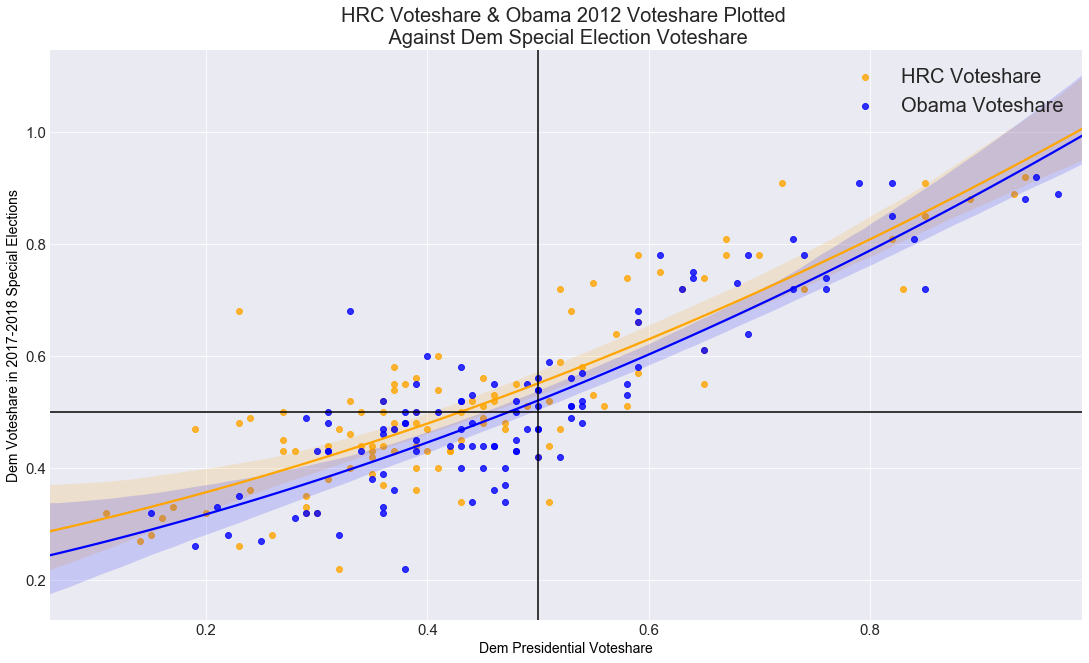

In [126]:
hrc = sns.regplot(x='16_clinton', y='18_d_vshare', data=dfkos, color='orange', scatter=True, marker='o', order=2, 
            label='HRC Voteshare')
bo = sns.regplot(x='12_obama', y='18_d_vshare', data=dfkos, color='blue', scatter=True, marker='o', order=2, 
           label='Obama Voteshare')
plt.xlabel('Dem Presidential Voteshare', fontsize=14, color='black')
plt.ylabel('Dem Voteshare in 2017-2018 Special Elections', fontsize=14, color='black')
plt.legend(fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.axhline(y=0.5, color='black')
plt.axvline(x=0.5, color='black')

plt.title("HRC Voteshare & Obama 2012 Voteshare Plotted \n Against Dem Special Election Voteshare", fontsize=20)

In [127]:
dfkos.head()

,date,state,District,held_by,winner,18_d_vshare,18_r_vshare,18_marg,16_clinton,16_trump,16_margin,16_marg_diff,12_obama,12_romney,12_margin,12_marg_diff
0,2018-05-01,FL,HD-39,(R),(R),0.40,0.60,-0.20,0.39,0.58,-0.19,-0.01,0.43,0.56,-0.12,-0.07
1,2018-05-01,FL,HD-114,(D),(D),0.51,0.47,0.04,0.56,0.42,0.14,-0.10,0.50,0.49,0.01,0.03
2,2018-04-24,AZ,AZ-08,(R),(R),0.47,0.52,-0.05,0.37,0.58,-0.21,0.16,0.37,0.62,-0.25,0.20
3,2018-04-24,NY,SD-32,(D),(D),0.89,0.02,0.86,0.93,0.05,0.88,-0.02,0.97,0.03,0.94,-0.07
4,2018-04-24,NY,SD-37,(D),(D),0.57,0.43,0.15,0.59,0.38,0.22,-0.07,0.54,0.45,0.09,0.06


In [128]:
dfkos.columns

Index(['date', 'state', 'District', 'held_by', 'winner', '18_d_vshare',
       '18_r_vshare', '18_marg', '16_clinton', '16_trump', '16_margin',
       '16_marg_diff', '12_obama', '12_romney', '12_margin', '12_marg_diff'],
      dtype='object')

In [129]:
dfkos.shape

(107, 16)

Text(0.5,1,'Romney & Trump Voteshare Plotted Against Republican Special Election Voteshare')

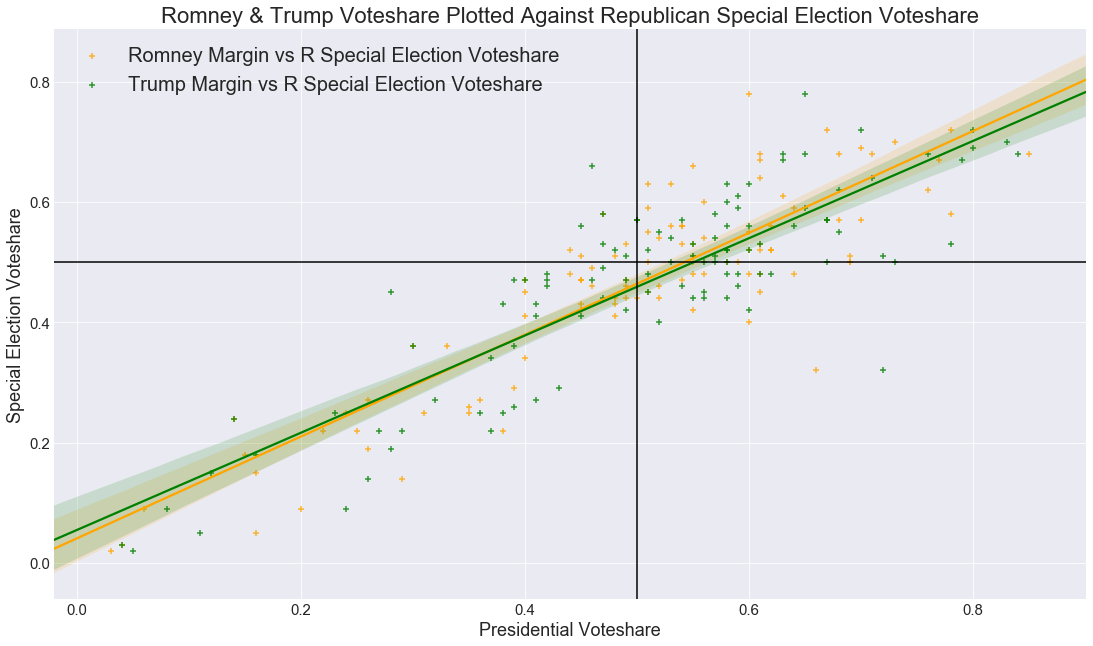

In [130]:
ROMNEY = sns.regplot(x='12_romney', y='18_r_vshare', data=dfkos, color='orange', scatter=True, marker='+', 
            order=1, label="Romney Margin vs R Special Election Voteshare")
TRUMP = sns.regplot(x='16_trump', y='18_r_vshare', data=dfkos, color='green', scatter=True, 
                    marker='+', order=1, label="Trump Margin vs R Special Election Voteshare")
plt.xlabel('Presidential Voteshare')
plt.ylabel('Special Election Voteshare')
fig = matplotlib.pyplot.gcf()
plt.legend(fontsize=20)
fig.set_size_inches(18.5, 10.5)
plt.axhline(y=0.5, color='black')
plt.axvline(x=0.5, color='black')

plt.title("Romney & Trump Voteshare Plotted Against Republican Special Election Voteshare", fontsize=22)

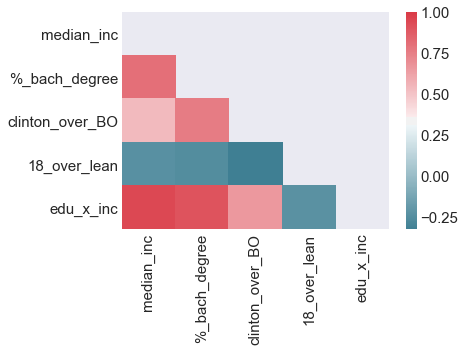

In [131]:
corr = df538.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df538.corr(), mask=mask, cmap=cmap)

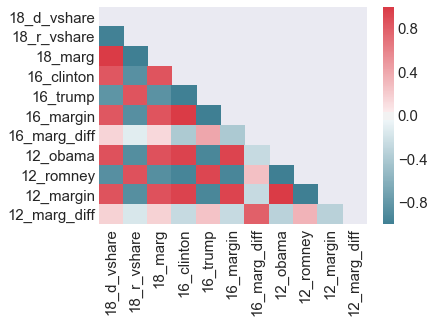

In [132]:
corr = dfkos.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

Text(0.5,1,'District Median Income By Democratic Special Election Overperformance')

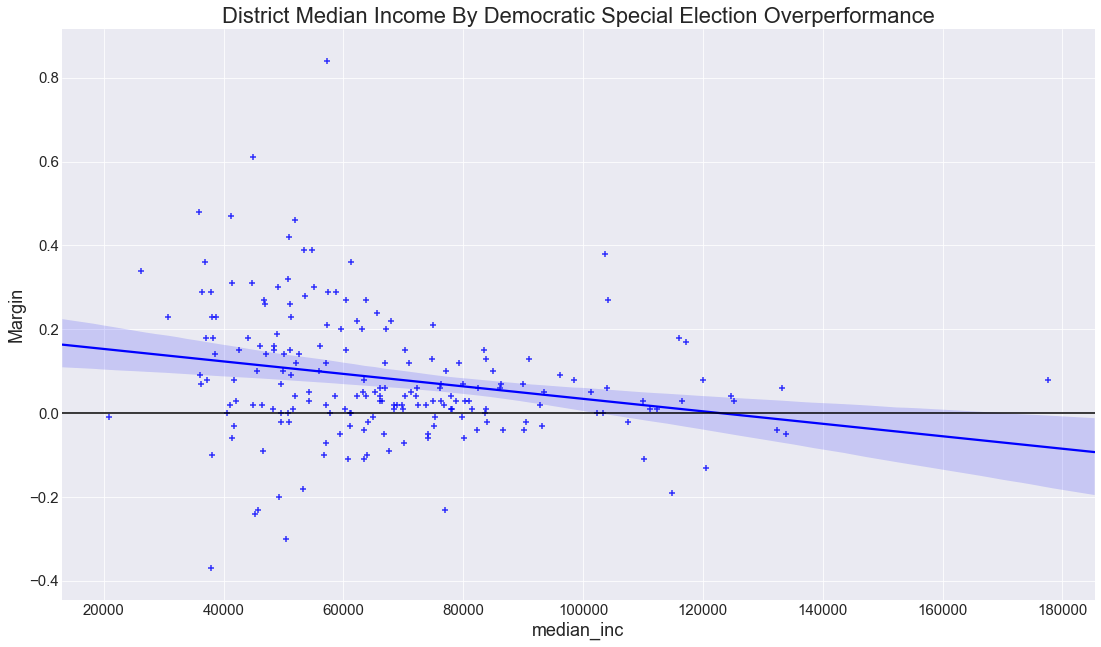

In [133]:
median = sns.regplot(x='median_inc', y='18_over_lean', data=df538, color='b', scatter=True, 
            marker='+', order=1)

fig = matplotlib.pyplot.gcf()
plt.ylabel('Margin')
fig.set_size_inches(18.5, 10.5)
plt.axhline(y=0.0, color='black')
plt.title('District Median Income By Democratic Special Election Overperformance', fontsize=22)

Text(0.5,1,'District Median Income By HRC Overperformance Compared to BO 2012')

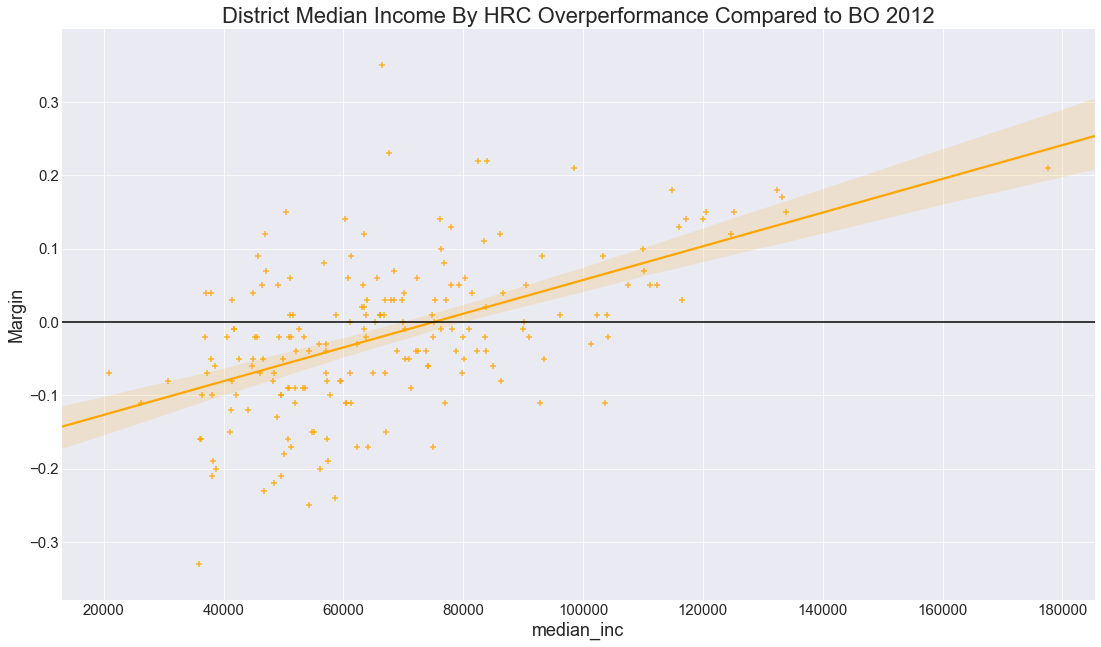

In [134]:
hrc_bo = sns.regplot(x='median_inc', y='clinton_over_BO', data=df538, color='orange', scatter=True, 
            marker='+', order=1, label='Median Income By HRC Overperformance Compared to BO 2012')
fig = matplotlib.pyplot.gcf()
plt.ylabel('Margin')
fig.set_size_inches(18.5, 10.5)
plt.axhline(y=0.0, color='black')
plt.title('District Median Income By HRC Overperformance Compared to BO 2012', fontsize=22)

/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:277: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


Text(0.5,1,'Log of the Education/Income Interaction Variable \n Plotted Against Democratic Special Election Overperformance')

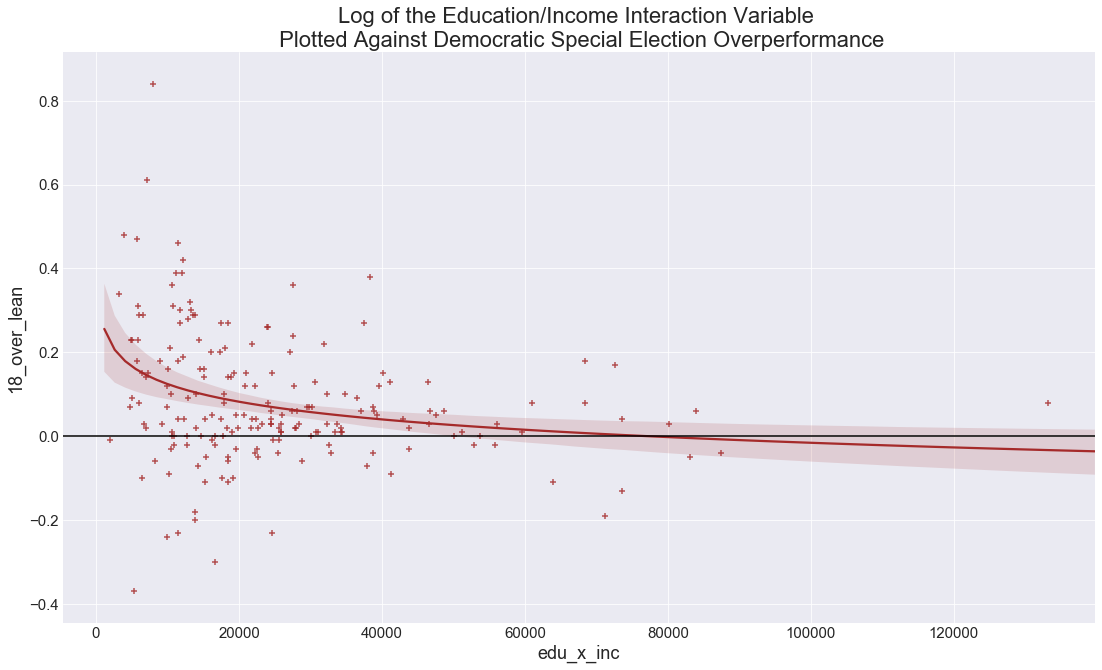

In [135]:
sns.regplot(x='edu_x_inc', y='18_over_lean', data=df538, color='brown', scatter=True, 
            marker='+', order=1, logx=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.axhline(y=0.0, color='black')
plt.title("Log of the Education/Income Interaction Variable \n Plotted Against Democratic Special Election Overperformance", fontsize=22)

In [136]:
df538.District.head()

0      HD-21
1    18th CD
2      SD-14
3      HD-51
4      HD-89
Name: District, dtype: object

In [137]:
dfkos.District.head()

0     HD-39
1    HD-114
2     AZ-08
3     SD-32
4     SD-37
Name: District, dtype: object

In [138]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}

In [147]:
df538['state_district'] = df538['state']+' '+df538.District

In [145]:
dfkos['state_district'] = dfkos['state'].map(states)+' '+dfkos['District']

In [150]:
dfkos.state_district.head()

0     Florida HD-39
1    Florida HD-114
2     Arizona AZ-08
3    New York SD-32
4    New York SD-37
Name: state_district, dtype: object

In [148]:
df538.state_district.head()

0           Alabama HD-21
1    Pennsylvania 18th CD
2         Tennessee SD-14
3          Oklahoma HD-51
4          Kentucky HD-89
Name: state_district, dtype: object

In [151]:
df538.set_index('state_district', inplace=True)
dfkos.set_index('state_district', inplace=True)

In [152]:
df_test = df538.merge(dfkos, how='inner', on='state_district')

In [153]:
df_test.columns

Index(['date_x', 'state_x', 'median_inc', '%_bach_degree', 'clinton_over_BO',
       '18_over_lean', 'District_x', 'edu_x_inc', 'date_y', 'state_y',
       'District_y', 'held_by', 'winner', '18_d_vshare', '18_r_vshare',
       '18_marg', '16_clinton', '16_trump', '16_margin', '16_marg_diff',
       '12_obama', '12_romney', '12_margin', '12_marg_diff'],
      dtype='object')

In [154]:
df_test['state_district'] = df_test.index+' '+df_test['state_x']

In [155]:
df_test.head()

,date_x,state_x,median_inc,%_bach_degree,clinton_over_BO,18_over_lean,District_x,edu_x_inc,date_y,state_y,...,18_marg,16_clinton,16_trump,16_margin,16_marg_diff,12_obama,12_romney,12_margin,12_marg_diff,state_district
state_district,,,,,,,,,,,,,,,,,,,,,
Tennessee SD-14,2018-03-13,Tennessee,48252.0,0.22,-0.08,0.01,SD-14,10615.44,2018-03-13,TN,...,-0.43,0.26,0.70,-0.44,0.00,0.32,0.67,-0.35,-0.08,Tennessee SD-14 Tennessee
Oklahoma HD-51,2018-03-06,Oklahoma,57202.0,0.18,-0.08,0.21,HD-51,10296.36,2018-03-06,OK,...,-0.44,0.15,0.80,-0.65,0.21,0.22,0.78,-0.56,0.12,Oklahoma HD-51 Oklahoma
Kentucky HD-89,2018-02-27,Kentucky,37858.0,0.16,-0.05,0.29,HD-89,6057.28,2018-02-27,KY,...,-0.34,0.17,0.79,-0.62,0.28,0.21,0.77,-0.56,0.23,Kentucky HD-89 Kentucky
Connecticut HD-120,2018-02-27,Connecticut,83869.0,0.37,-0.04,0.01,HD-120,31031.53,2018-02-27,CT,...,0.02,0.49,0.47,0.02,0.00,0.53,0.46,0.06,-0.05,Connecticut HD-120 Connecticut
Kentucky HD-49,2018-02-20,Kentucky,57177.0,0.14,-0.16,0.84,HD-49,8004.78,2018-02-20,KY,...,0.37,0.23,0.72,-0.49,0.86,0.33,0.66,-0.33,0.70,Kentucky HD-49 Kentucky


In [156]:
dfkos.sort_values(by='18_d_vshare', inplace=True)

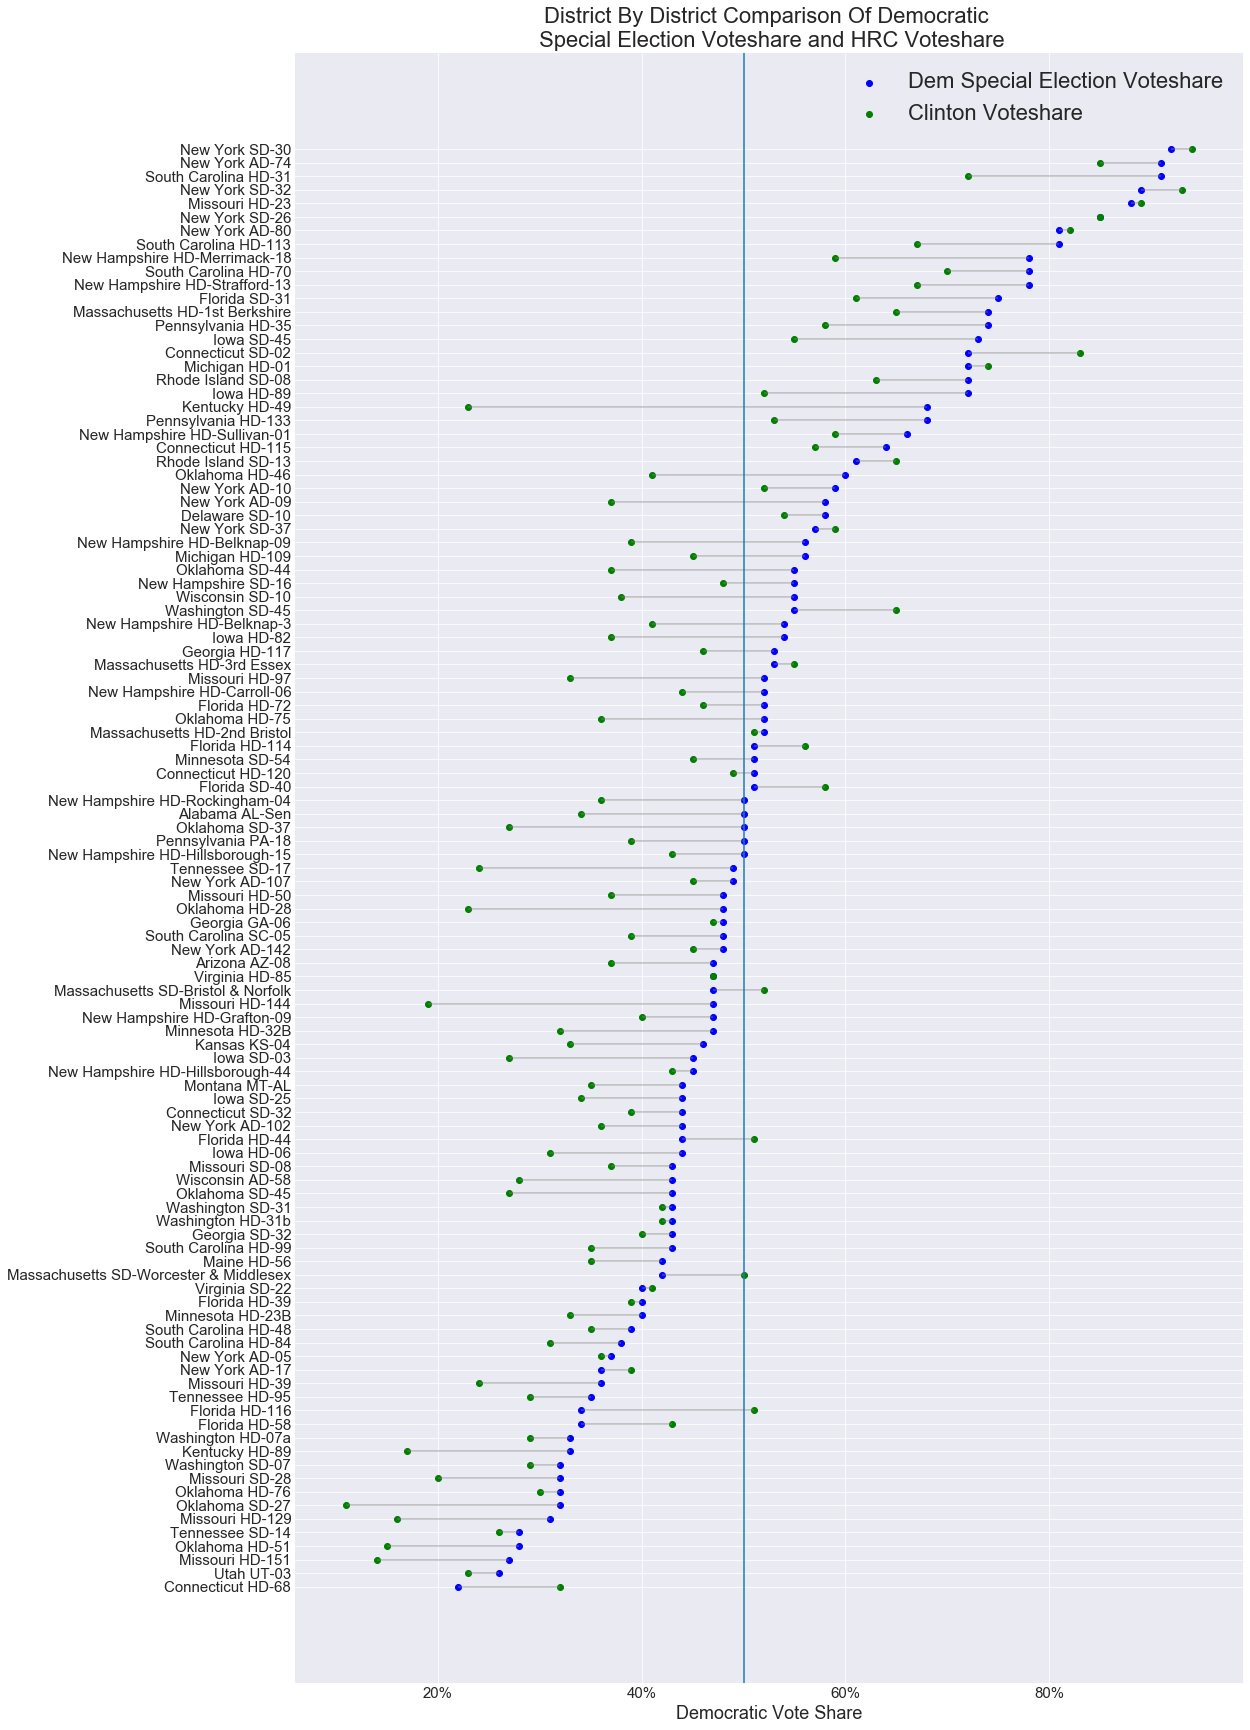

In [193]:
my_range=range(1,len(dfkos.index)+1)

plt.hlines(y=my_range, xmin=dfkos['18_d_vshare'], xmax=dfkos['16_clinton'], color='grey', alpha=0.5)
ax = plt.scatter(dfkos['18_d_vshare'], my_range, color='blue', alpha=1, 
                 label='Dem Special Election Voteshare')
plt.scatter(dfkos['16_clinton'], my_range, color='green', alpha=1 , label='Clinton Voteshare')
plt.legend(fontsize=22)
plt.axvline(x=0.5)

ax.axes.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.title("District By District Comparison Of Democratic \n Special Election Voteshare and HRC Voteshare", 
          fontsize=22)
plt.xlabel("Democratic Vote Share")
# Label the districts
plt.yticks(my_range, dfkos.index)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17, 30)


In [190]:
dfkos.sort_values(by='18_d_vshare', inplace=True)

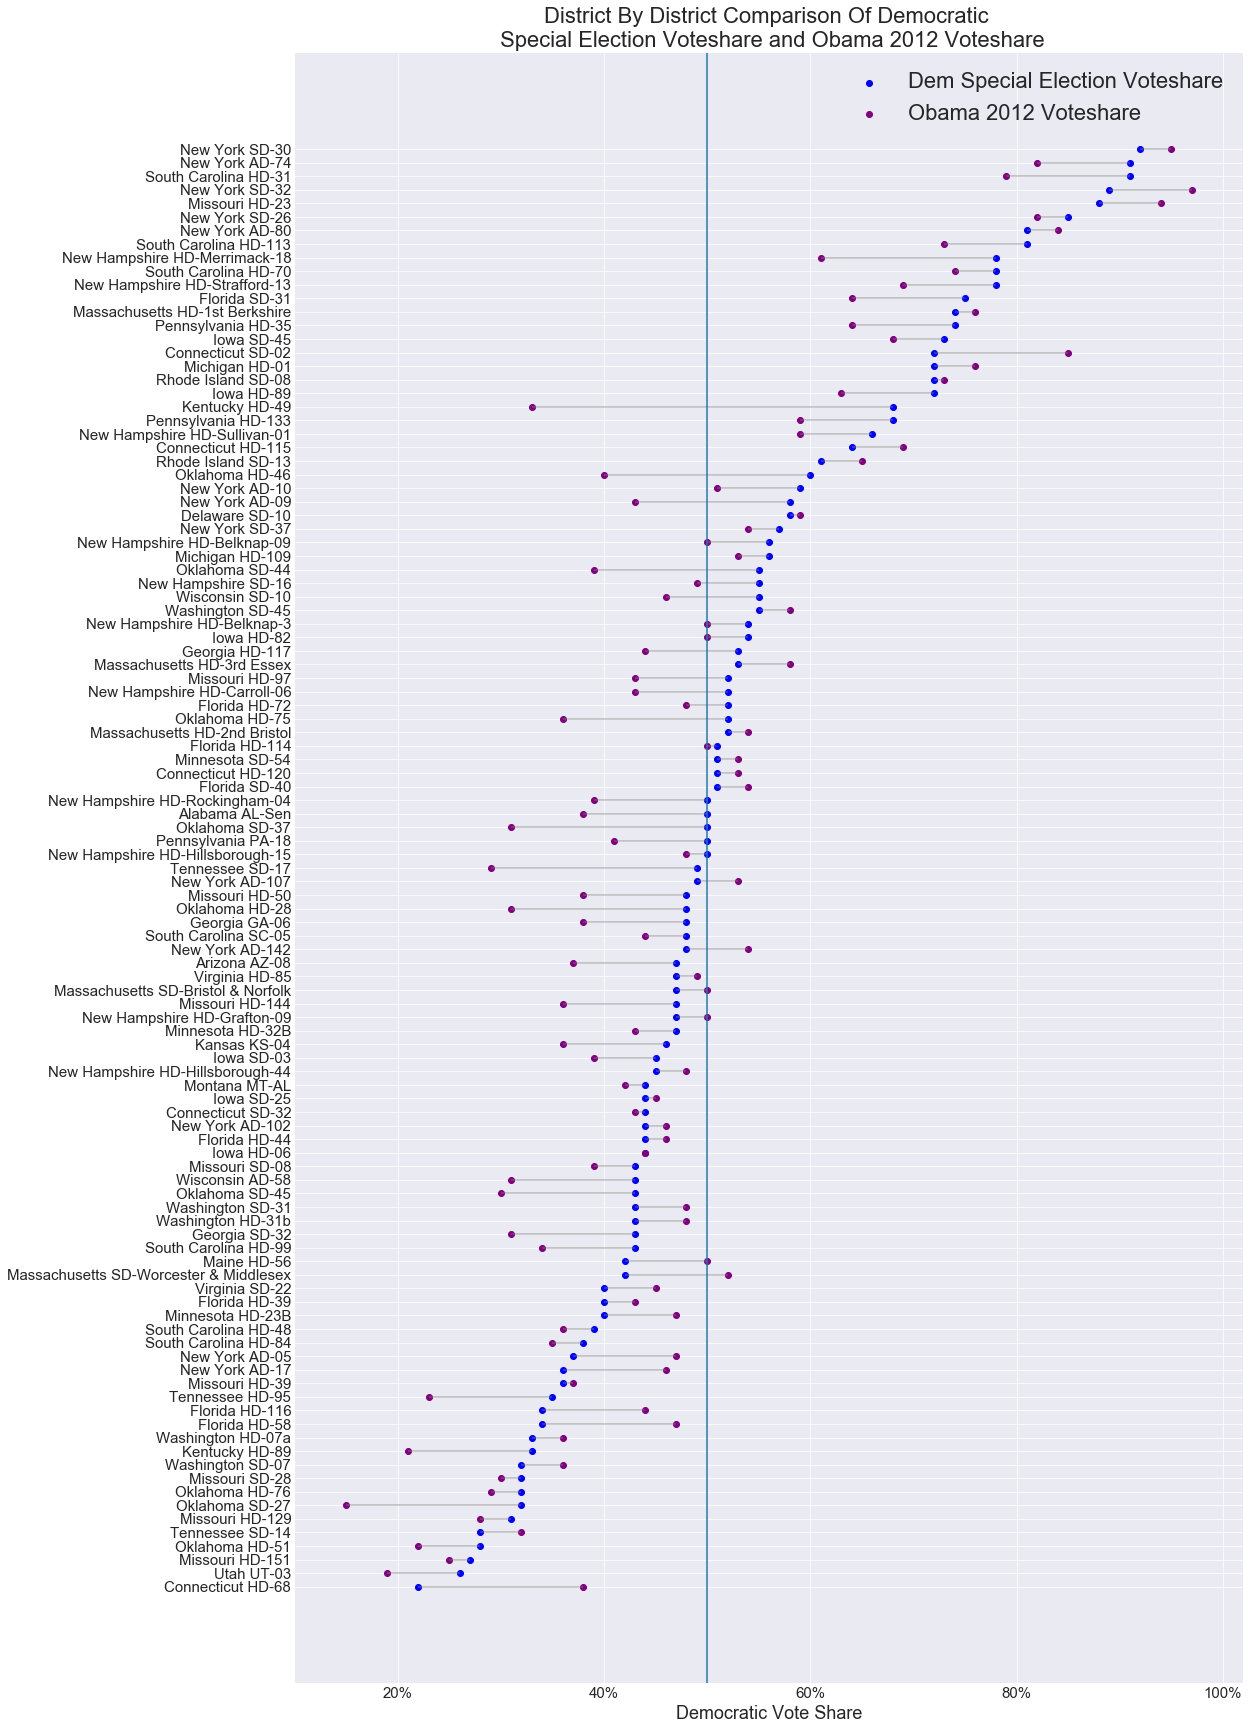

In [195]:
my_range=range(1,len(dfkos.index)+1)

plt.hlines(y=my_range, xmin=dfkos['18_d_vshare'], xmax=dfkos['12_obama'], color='grey', alpha=0.5)
ax = plt.scatter(dfkos['18_d_vshare'], my_range, color='blue', alpha=1, 
                 label='Dem Special Election Voteshare')
plt.scatter(dfkos['12_obama'], my_range, color='purple', alpha=1 , label='Obama 2012 Voteshare')

plt.legend(fontsize=22)
plt.axvline(x=0.5)

ax.axes.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.title("District By District Comparison Of Democratic \n Special Election Voteshare and Obama 2012 Voteshare", 
          fontsize=22)
plt.xlabel("Democratic Vote Share")
# Label the districts
plt.yticks(my_range, dfkos.index)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17, 30)


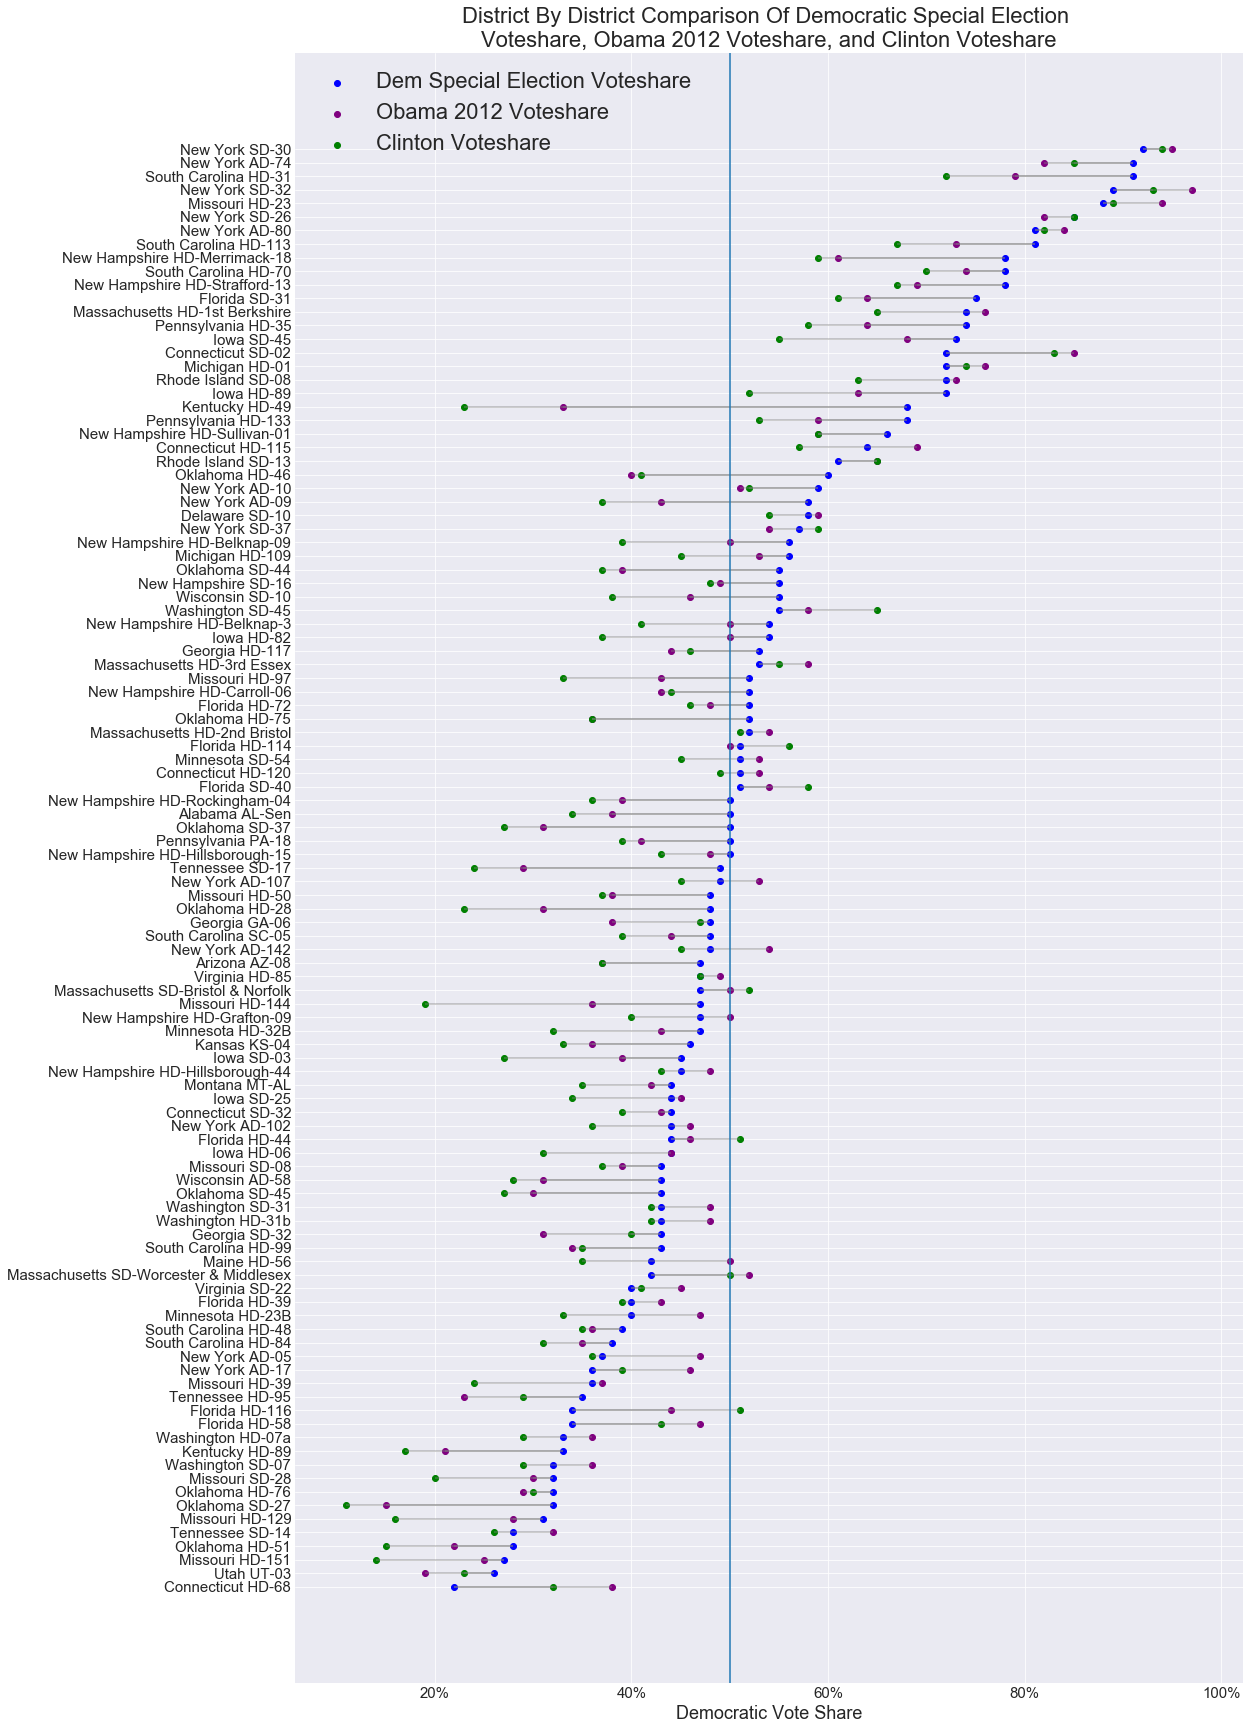

In [217]:
my_range=range(1,len(dfkos.index)+1)

plt.hlines(y=my_range, xmin=dfkos['18_d_vshare'], xmax=dfkos['16_clinton'], color='grey', alpha=0.5)
plt.hlines(y=my_range, xmin=dfkos['18_d_vshare'], xmax=dfkos['12_obama'], color='grey', alpha=0.5)

ax = plt.scatter(dfkos['18_d_vshare'], my_range, color='blue', alpha=1, 
                 label='Dem Special Election Voteshare')
plt.scatter(dfkos['12_obama'], my_range, color='purple', alpha=1 , label='Obama 2012 Voteshare')
plt.scatter(dfkos['16_clinton'], my_range, color='green', alpha=1 , label='Clinton Voteshare')

plt.legend(fontsize=22)
plt.axvline(x=0.5)

ax.axes.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.title("District By District Comparison Of Democratic Special Election \n\
Voteshare, Obama 2012 Voteshare, and Clinton Voteshare", fontsize=22)
plt.xlabel("Democratic Vote Share")
# Label the districts
plt.yticks(my_range, dfkos.index)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17, 30)
